### Imorting the necessary libraries

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Data loading

In [121]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data exploration

In [122]:
df.shape

(301, 9)

In [123]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [126]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [127]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [135]:
df=df[df['Owner']!=3]
df['Owner'].value_counts()

Owner
0    290
1     10
Name: count, dtype: int64

In [145]:
df['Car_Name'].value_counts(ascending=False)

Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Bajaj Pulsar RS200         1
Honda Activa 125           1
TVS Jupyter                1
Hero Honda Passion Pro     1
corolla                    1
Name: count, Length: 97, dtype: int64

In [147]:
df['Fuel_Type'].value_counts(ascending=False)

Fuel_Type
Petrol    238
Diesel     60
CNG         2
Name: count, dtype: int64

In [149]:
df['Seller_Type'].value_counts(ascending=False)

Seller_Type
Dealer        195
Individual    105
Name: count, dtype: int64

In [151]:
df['Transmission'].value_counts(ascending=False)

Transmission
Manual       261
Automatic     39
Name: count, dtype: int64

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


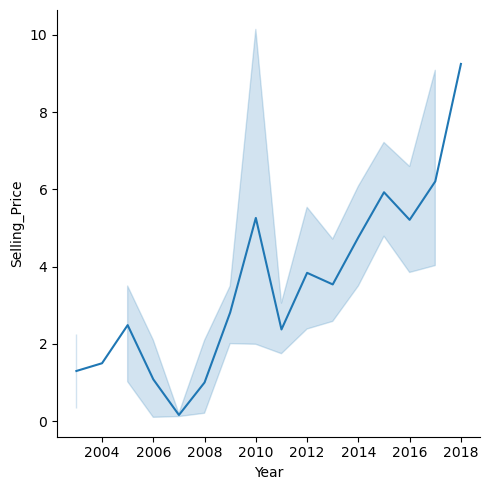

In [163]:
sns.relplot(x='Year',y='Selling_Price',data=df,kind='line')
plt.show()

E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\programms\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


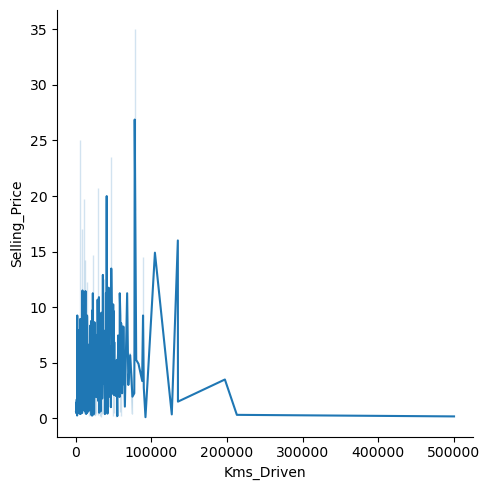

In [165]:
sns.relplot(x='Kms_Driven',y='Selling_Price',data=df,kind='line')
plt.show()

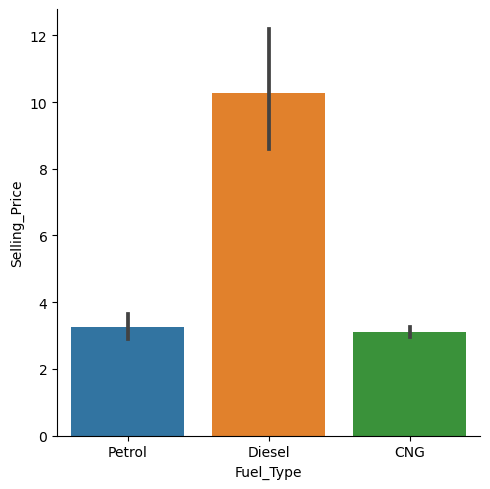

In [167]:
sns.catplot(x='Fuel_Type',y='Selling_Price',data=df,kind='bar')
plt.show()

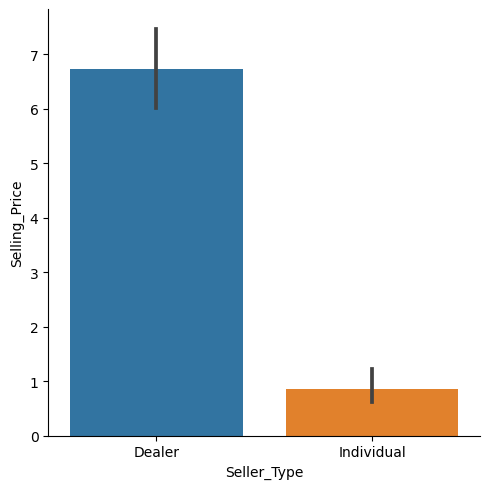

In [171]:
sns.catplot(x='Seller_Type',y='Selling_Price',data=df,kind='bar')
plt.show()

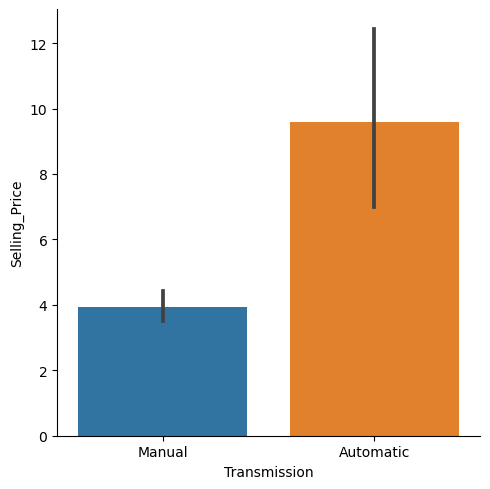

In [173]:
sns.catplot(x='Transmission',y='Selling_Price',data=df,kind='bar')
plt.show()

In [191]:
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [193]:
df.replace({"Seller_Type":{"Dealer":1,"Individual":1}},inplace=True)

In [199]:
df.replace({"Fuel_Type":{"Petrol":2,"Diesel":1,"CNG":0} },inplace=True)

In [201]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,2,1,0,0
3,wagon r,2011,2.85,4.15,5200,2,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


In [215]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [217]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [219]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Train r2_score : ",r2_score(y_train,y_pred_train))
print("Test r2_score : ",r2_score(y_test,y_pred))

Train r2_score :  0.8804927239673774
Test r2_score :  0.8372610863401095


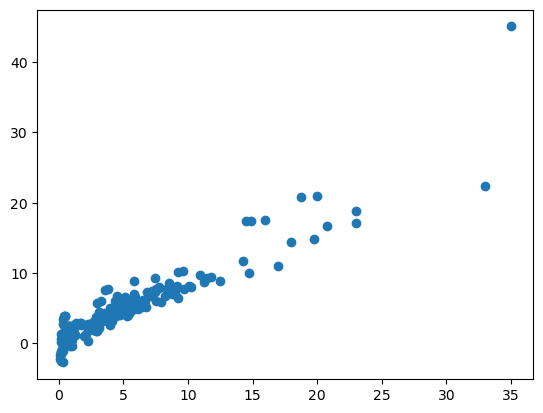

In [223]:
plt.scatter(x=y_train,y=y_pred_train)
plt.show()